In [274]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [275]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [276]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [278]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [279]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# Data Preprocess
1. Drop nan value
2. Drop the value that the 'gender == Other'
3. Convert Categories to numbers
4. Split the Dataset into train set and test set

In [280]:
# Step 1: Drop nan value
df = df.dropna()

In [281]:
# Step 2: Drop the value that the 'gender == Other'
df = df.loc[df['gender'] != 'Other']

In [282]:
# Step 3: Convert Categories to numbers
df['gender'] = df.iloc[:,1].astype('category').cat.codes
df['ever_married'] = df.iloc[:,5].astype('category').cat.codes
df['work_type'] = df.iloc[:,6].astype('category').cat.codes
df['Residence_type'] = df.iloc[:,7].astype('category').cat.codes
df['smoking_status'] = df.iloc[:,10].astype('category').cat.codes

In [283]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   gender             4908 non-null   int8   
 2   age                4908 non-null   float64
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_married       4908 non-null   int8   
 6   work_type          4908 non-null   int8   
 7   Residence_type     4908 non-null   int8   
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     4908 non-null   int8   
 11  stroke             4908 non-null   int64  
dtypes: float64(3), int64(4), int8(5)
memory usage: 330.7 KB


In [285]:
df = df.sample(frac=1).reset_index(drop=True)

In [286]:
# Step 4: Split the Dataset into train set and test set
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Feature Selection

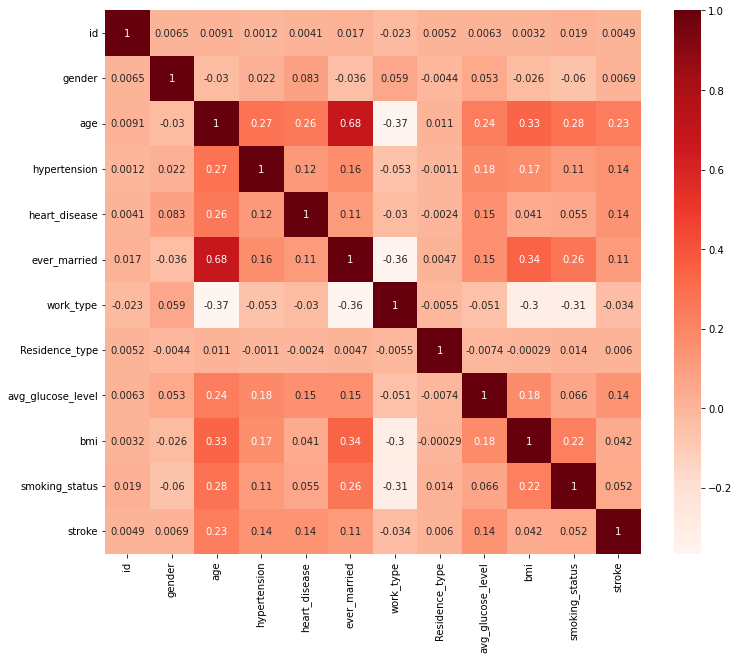

In [287]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [288]:
#Correlation with output variable
cor_target = abs(cor["stroke"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

age                  0.232313
hypertension         0.142503
heart_disease        0.137929
ever_married         0.105051
avg_glucose_level    0.138984
stroke               1.000000
Name: stroke, dtype: float64

In [289]:
df=df[['age','hypertension','heart_disease','ever_married','avg_glucose_level','stroke']]

In [290]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [291]:
from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = 0.8
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(x, y)

In [292]:
X_res['stroke']=y_res

In [293]:
data=X_res

In [294]:
data

,age,hypertension,heart_disease,ever_married,avg_glucose_level,stroke
0,60.0,0,0,1,74.08,0
1,18.0,0,0,0,80.06,0
2,73.0,1,0,1,124.78,0
3,55.0,0,0,1,65.33,0
4,54.0,0,0,1,76.05,0
...,...,...,...,...,...,...
465,57.0,0,0,1,197.28,1
466,73.0,0,1,1,219.73,1
467,68.0,1,0,1,206.09,1
468,63.0,0,0,1,137.30,1


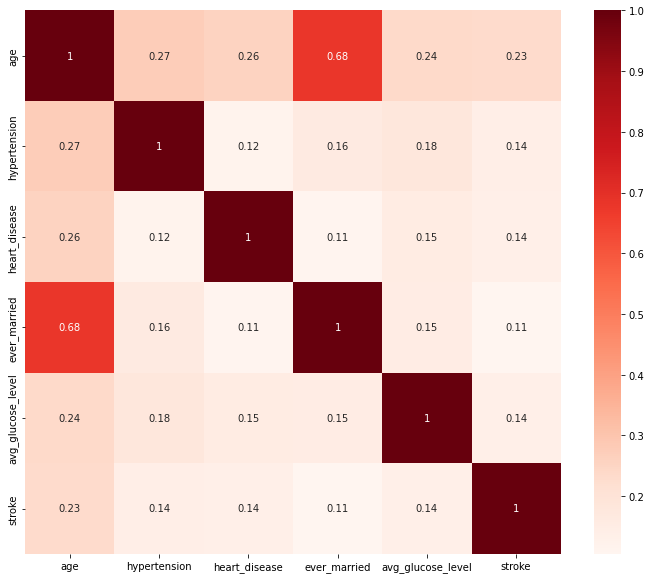

In [295]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

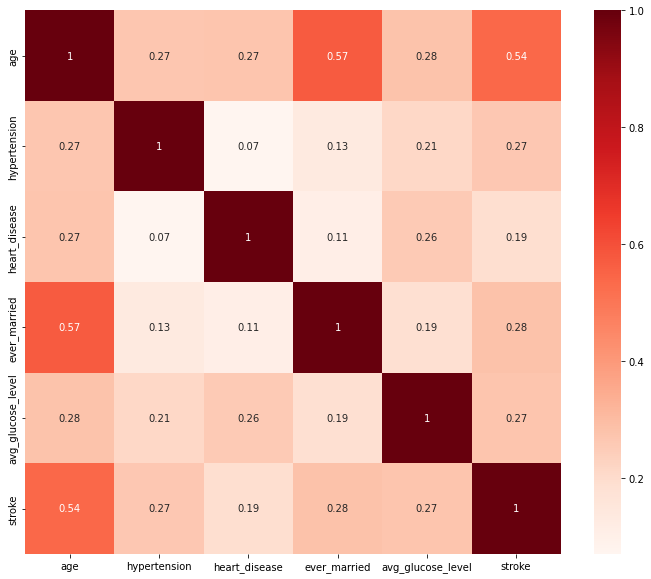

In [296]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [297]:
data['stroke'].value_counts()

0    261
1    209
Name: stroke, dtype: int64

In [298]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [299]:
y_test.value_counts()

0    64
1    30
Name: stroke, dtype: int64

# Predict
- Method 1: Naive Bayes
    - 1.1: GaussianNB
    - 1.2: BernoulliNB
    - 1.3: ComplementNB
- Method 2: Decision Tree
    - 2.1: DecisionTreeClassifier
    - 2.2: ExtraTreeClassifier
- Method 3: KNN
- Method 4: SVM
- Method 5: Neural Network

### Method 1: Naive Bayes

[https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes)

In the Bayesian method, we tried three Bayesian classification methods: GaussianNB, BernoulliNB, ComplementNB. Among the three of them, the results of GaussianNB are relatively best, but generally speaking, their prediction results are not very good. 

Adjusting the parameters in these three methods is of little significance. We tried to adjust some parameters, but the results didn't change or even were worse.

For Naive Bayes classifier, there is basically no room for adjustment, at least in the current data set, the classification effect cannot be well improved by adjusting the parameters.

In [300]:
# Naive Bayes - GaussianNB
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb = model_gnb.fit(X_train, y_train)
print("Train Score:", model_gnb.score(X_train, y_train))
print("Test Score:", model_gnb.score(X_test, y_test))

Train Score: 0.7579787234042553
Test Score: 0.776595744680851


In [301]:
# Naive Bayes - BernoulliNB
from sklearn.naive_bayes import BernoulliNB
model_bnb = BernoulliNB()
model_bnb = model_bnb.fit(X_train, y_train)
print("Train Score:", model_bnb.score(X_train, y_train))
print("Test Score:", model_bnb.score(X_test, y_test))

Train Score: 0.6569148936170213
Test Score: 0.6595744680851063


In [302]:
# Naive Bayes - ComplementNB
from sklearn.naive_bayes import ComplementNB
model_conb = ComplementNB()
model_conb = model_conb.fit(X_train, y_train)
print("Train Score:", model_conb.score(X_train, y_train))
print("Test Score:", model_conb.score(X_test, y_test))

Train Score: 0.5611702127659575
Test Score: 0.6382978723404256


### Method 2: Decision Tree
[https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)

In this section, we mainly use two kinds of decision tree classifiers: DecisionTreeClassifier and ExtraTreeClassifier. We explored the influence of the following parameters on the decision tree model:
- criterion: This parameter can determine how the function measures the quality of a split.
- splitter: This parameter can determine the strategy that is used to choose the split at each node.
- max_depth: This parameter set the maximum depth of the tree.
- min_samples_split: This parameter set the minimum number of samples required to split an internal node.
- min_samples_leaf: This parameter set the minimum number of samples required to be at a leaf node.
- random_state: This parameter controls the randomness of the estimator.

The parameter that has the greatest impact on the model is random_state. In the default state, each time you run this model will be different, because it will be random each time. In other words, for the decision tree model, the order of construction is different each time, so the final tree will be different, which will also cause the classification effect of the model to be very different. As a result, we need to fix a value to it, then the model will always start in the same state.

There are 2 options in criterion and splitter. "gini" and "entropy" are for criterion, "random" and "best" are for splitter. Which option is selected by these two parameters is not absolute. We have tried several times and found that the best model in different situations may be different in these two parameters, and we have not found any rules at the same time. Therefore, when finding the parameters of the best model, this one can only be tried, and it is difficult to judge which one should be selected through experience.

Because the next three parameters(max_depth, min_samples_split and min_samples_leaf) are of numeric type, it is easier to find the law. In the test data, they have no obvious laws. When they change, the correct rate will fluctuate in a certain range. But in the training data, there are some very stable rules. On max_depth, as max_depth continues to increase, the accuracy rate will continue to rise until it finally stabilizes to 100%. On min_samples_split and min_samples_leaf, as they continue to increase, the overall accuracy rate will continue to decline. We analyze the reasons and think that when max_depth becomes larger, min_samples_split and min_samples_leaf become smaller, the model is more likely to overfit; when max_depth becomes smaller, min_samples_split and min_samples_leaf become larger, the model is more likely to underfit.

Therefore, to find the best parameter set, you need to try different parameter combinations, so that the model can achieve a balance between over-fitting and under-fitting, so as to find the best model.

For decision tree classifier, by default, because the depth of the tree is unlimited, the accuracy of the model on the trainset must reach 100% at this time. But this time the model is over-fitting. Generally speaking, at this time, the accuracy of the model on the test set is only 70%. By adjusting the parameters, the accuracy rate on the trainset will inevitably decline, but it can ensure that the model can stably reach an accuracy rate of 80% on the testset. Therefore, when we use the decision tree, we must be very careful to set the parameters, because it is easy to overfit in the default configuration, and it may work well on the training set but not on the test set.

In [303]:
random_state_num = 0

In [304]:
# Decision Tree - DecisionTreeClassifier

from sklearn import tree
def decision_tree(print_flag = False, **args):
    model_tree = tree.DecisionTreeClassifier(**args, random_state=random_state_num)
    model_tree = model_tree.fit(X_train, y_train)
    if print_flag:
        print("args:", args)
        print("Score: {}, {}".format(model_tree.score(X_train, y_train),model_tree.score(X_test, y_test)))
        # print("Train Score:", model_tree.score(X_train, y_train))
        # print("Test Score:", model_tree.score(X_test, y_test))
        print("--------------")
    return model_tree.score(X_train, y_train), model_tree.score(X_test, y_test), args

def get_best_decision_tree():
    criterions = ["gini", "entropy"]
    splitters = ["best", "random"]
    max_depths = [i for i in range(1,10)]
    min_samples_splits = [i for i in range(2,10)]
    min_samples_leaves = [i for i in range(1,5)]
    
    train_scores, test_scores, args_records = [], [], []
    for criterion in criterions:
        for splitter in splitters:
            for max_depth in max_depths:
                for min_samples_split in min_samples_splits:
                    for min_samples_leaf in min_samples_leaves:
                        outputs = decision_tree(criterion = criterion,
                                      splitter = splitter,
                                      max_depth = max_depth,
                                      min_samples_split = min_samples_split,
                                      min_samples_leaf = min_samples_leaf)
                        train_score, test_score, args = outputs
                        train_scores.append(train_score)
                        test_scores.append(test_score)
                        args_records.append(args)
                        
    idx = test_scores.index(max(test_scores))
    return (train_scores[idx], test_scores[idx], args_records[idx])

def compare_decision_tree():
    print("Baseline:")
    decision_tree(print_flag=True)
    
    outputs = get_best_decision_tree()
    print("Best Model:")
    print("args: ", outputs[2])
    print("Score: {}, {}".format(outputs[0], outputs[1]))

compare_decision_tree()

Baseline:
args: {}
Score: 1.0, 0.7340425531914894
--------------
Best Model:
args:  {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 2}
Score: 0.7978723404255319, 0.8191489361702128


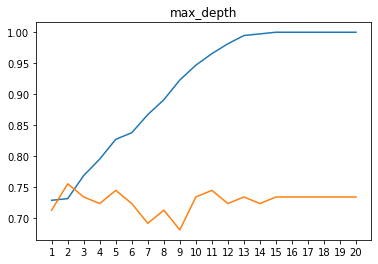

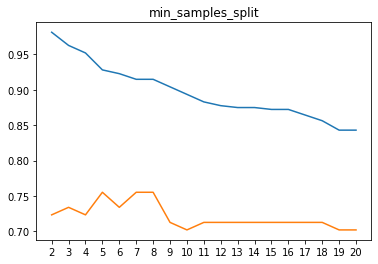

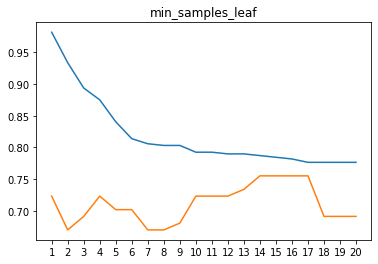

In [305]:
# Decision Tree - DecisionTreeClassifier

# max_depth
def plot_tree_max_depth():
    x_data = []
    train_data = []
    test_data = []
    for num in range(1, 21):
        train_score, test_score,_ = decision_tree(print_flag = False, criterion = "gini", splitter = "best", max_depth = num)
        train_data.append(train_score)
        test_data.append(test_score)
        x_data.append(num)

    plt.plot(x_data, train_data)
    plt.plot(x_data, test_data)
    plt.xticks([i for i in range(1, 21)])
    plt.title("max_depth")
    plt.show()

# min_samples_split
def plot_tree_samples_split():
    x_data = []
    train_data = []
    test_data = []
    for num in range(2, 21):
        train_score, test_score,_ = decision_tree(print_flag = False, criterion = "gini", splitter = "best", max_depth = 12,
                                                min_samples_split = num)
        train_data.append(train_score)
        test_data.append(test_score)
        x_data.append(num)

    plt.plot(x_data, train_data)
    plt.plot(x_data, test_data)
    plt.xticks([i for i in range(2, 21)])
    plt.title("min_samples_split")
    plt.show()

# min_samples_leaf
def plot_tree_min_samples_leaf():
    x_data = []
    train_data = []
    test_data = []
    for num in range(1, 21):
        train_score, test_score,_ = decision_tree(print_flag = False, criterion = "gini", splitter = "best", max_depth = 12,
                                                min_samples_split = 2, min_samples_leaf = num)
        train_data.append(train_score)
        test_data.append(test_score)
        x_data.append(num)

    plt.plot(x_data, train_data)
    plt.plot(x_data, test_data)
    plt.xticks([i for i in range(1, 21)])
    plt.title("min_samples_leaf")
    plt.show()


plot_tree_max_depth()
plot_tree_samples_split()
plot_tree_min_samples_leaf()

In [306]:
# Decision Tree - ExtraTreeClassifier

def extra_tree(print_flag = False, **args):
    model_tree = tree.ExtraTreeClassifier(**args, random_state=random_state_num)
    model_tree = model_tree.fit(X_train, y_train)
    if print_flag:
        print("args:", args)
        print("Score: {}, {}".format(model_tree.score(X_train, y_train),model_tree.score(X_test, y_test)))
        # print("Train Score:", model_tree.score(X_train, y_train))
        # print("Test Score:", model_tree.score(X_test, y_test))
        print("--------------")
    return model_tree.score(X_train, y_train), model_tree.score(X_test, y_test), args

def get_best_extra_tree():
    criterions = ["gini", "entropy"]
    splitters = ["best", "random"]
    max_depths = [i for i in range(1,10)]
    min_samples_splits = [i for i in range(2,10)]
    min_samples_leaves = [i for i in range(1,5)]
    
    train_scores, test_scores, args_records = [], [], []
    for criterion in criterions:
        for splitter in splitters:
            for max_depth in max_depths:
                for min_samples_split in min_samples_splits:
                    for min_samples_leaf in min_samples_leaves:
                        outputs = extra_tree(criterion = criterion,
                                      splitter = splitter,
                                      max_depth = max_depth,
                                      min_samples_split = min_samples_split,
                                      min_samples_leaf = min_samples_leaf)
                        train_score, test_score, args = outputs
                        train_scores.append(train_score)
                        test_scores.append(test_score)
                        args_records.append(args)
                        
    idx = test_scores.index(max(test_scores))
    return (train_scores[idx], test_scores[idx], args_records[idx])

def compare_extra_tree():
    print("Baseline:")
    extra_tree(print_flag=True)
    
    outputs = get_best_extra_tree()
    print("Best Model:")
    print("args: ", outputs[2])
    print("Score: {}, {}".format(outputs[0], outputs[1]))

compare_extra_tree()
# extra_tree()
# _,_ = extra_tree(criterion = "gini", splitter = "best")
# extra_tree(criterion = "gini", splitter = "random")
# extra_tree(criterion = "entropy", splitter = "best")
# extra_tree(criterion = "entropy", splitter = "random")

Baseline:
args: {}
Score: 1.0, 0.6595744680851063
--------------
Best Model:
args:  {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 3}
Score: 0.8191489361702128, 0.8191489361702128


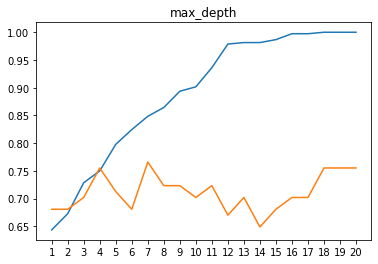

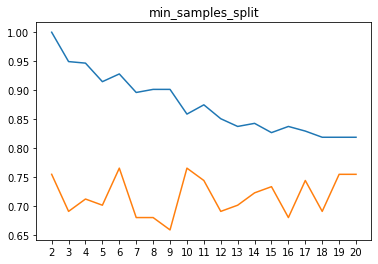

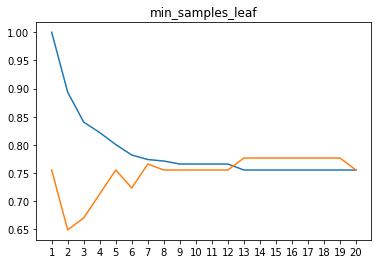

In [307]:
# Decision Tree - ExtraTreeClassifier

# max_depth
def plot_extratree_max_depth():
    x_data = []
    train_data = []
    test_data = []
    for num in range(1, 21):
        train_score, test_score,_ = extra_tree(print_flag = False, criterion = "gini", splitter = "best", max_depth = num)
        train_data.append(train_score)
        test_data.append(test_score)
        x_data.append(num)

    plt.plot(x_data, train_data)
    plt.plot(x_data, test_data)
    plt.xticks([i for i in range(1, 21)])
    plt.title("max_depth")
    plt.show()

# min_samples_split
def plot_extratree_samples_split():
    x_data = []
    train_data = []
    test_data = []
    for num in range(2, 21):
        train_score, test_score,_ = extra_tree(print_flag = False, criterion = "gini", splitter = "best",
                                                min_samples_split = num)
        train_data.append(train_score)
        test_data.append(test_score)
        x_data.append(num)

    plt.plot(x_data, train_data)
    plt.plot(x_data, test_data)
    plt.xticks([i for i in range(2, 21)])
    plt.title("min_samples_split")
    plt.show()
    # print(test_data.index(max(test_data)))
    

# min_samples_leaf
def plot_extratree_min_samples_leaf():
    x_data = []
    train_data = []
    test_data = []
    for num in range(1, 21):
        train_score, test_score,_ = extra_tree(print_flag = False, criterion = "gini", splitter = "best", min_samples_leaf = num)
        train_data.append(train_score)
        test_data.append(test_score)
        x_data.append(num)

    plt.plot(x_data, train_data)
    plt.plot(x_data, test_data)
    plt.xticks([i for i in range(1, 21)])
    plt.title("min_samples_leaf")
    plt.show()

plot_extratree_max_depth()
plot_extratree_samples_split()
plot_extratree_min_samples_leaf()

### Method 3: KNN
[https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In this section, we explored the possible impact of the following three parameters in KNN, and tried to optimize the parameters to obtain higher scores:
- n_neighbors: Number of neighbors required for each sample.
- weights: Weight function used in prediction.
- p: Power parameter for the Minkowski metric.


For the parameter "n_neighbors", generally speaking, when it is smaller, the performance on the trainset is better (when n_neighbors = 1, the score is always 1), and the score will continue to decrease as it increases. On the testset, the score generally fluctuates in an interval, and there is no special rule.

For the parameter "weights", we have not found that one of them is necessarily better than the other, so in actual use, it should be adjusted flexibly according to the situation.

For the parameter "p", on the trainset, the performance is erratic. But on the testset, empirically, when p = 1 (manhattan_distance (l1)) or 2 (euclidean_distance (l2)), the performance will be better than when p is other value.

For KNN classifier, sometimes the parameters can be adjusted to a greater extent, and sometimes the changes are not big. On average, the mean accuracy in testset is around 77%.


In [308]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
def KNN(**args):
    model_knn = KNeighborsClassifier(**args)
    model_knn.fit(X_train, y_train)
    return model_knn.score(X_train, y_train), model_knn.score(X_test, y_test), args
    # print("Train Score:", model_knn.score(X_train, y_train))
    # print("Test Score:", model_knn.score(X_test, y_test))

def get_best_KNN():
    from itertools import product
    n_neighbors = [i for i in range(1,20)]
    weights = ['uniform', 'distance']
    # When p = 1, this is equivalent to using manhattan_distance (l1), and
    # euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance
    # (l_p) is used.
    p = [1,2,3,4,5]
    
    train_scores, test_scores, args_records = [], [], []
    for args in product(n_neighbors, weights, p):
        outputs = KNN(n_neighbors = args[0], weights = args[1], p = args[2])
        train_scores.append(outputs[0])
        test_scores.append(outputs[1])
        args_records.append(outputs[2])
    idx = test_scores.index(max(test_scores))
    return (train_scores[idx], test_scores[idx], args_records[idx])

def compare_KNN():
    print("Baseline Result: ")
    baseline_result = KNN()
    print("Score: {}, {}".format(baseline_result[0], baseline_result[1]))
    
    print("Best Result: ")
    best_result = get_best_KNN()
    print("Args: {}".format(best_result[2]))
    print("Score: {}, {}".format(best_result[0], best_result[1]))


compare_KNN()

Baseline Result: 
Score: 0.8031914893617021, 0.7021276595744681
Best Result: 
Args: {'n_neighbors': 14, 'weights': 'uniform', 'p': 3}
Score: 0.7473404255319149, 0.8191489361702128


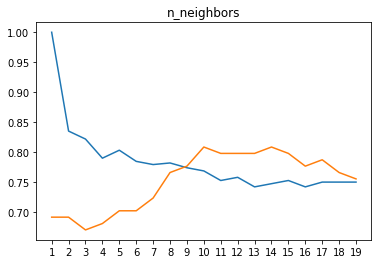

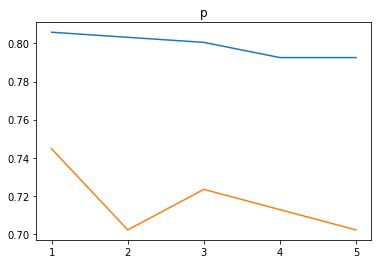

In [309]:
# KNN

# n_neighbors
def plot_KNN_n_neighbors():
    x_data = []
    train_data = []
    test_data = []
    n_neighbors = [i for i in range(1,20)]
    for num in n_neighbors:
        result = KNN(n_neighbors = num)
        train_data.append(result[0])
        test_data.append(result[1])
        
        x_data.append(num)
    plt.plot(x_data, train_data)
    plt.plot(x_data, test_data)
    plt.xticks(n_neighbors)
    plt.title("n_neighbors")
    plt.show()

# p
def plot_KNN_p():
    p = [1,2,3,4,5]
    x_data = []
    train_data = []
    test_data = []
    for num in p:
        result = KNN(p = num)
        train_data.append(result[0])
        test_data.append(result[1])
        
        x_data.append(num)
    plt.plot(x_data, train_data)
    plt.plot(x_data, test_data)
    plt.xticks(p)
    plt.title("p")
    plt.show()

plot_KNN_n_neighbors()
plot_KNN_p()

### Method 4: SVM
[https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In this section, we select two main parameters in SVC to explore how the parameters affect the model:
- C: Regularization parameter.
- kernel: Specifies the kernel type to be used in the algorithm.

For the parameter "C", the default value is good enough, and the default value is generally used in the best model.

For the parameter "kernel", for different situations, the model may use different kernel functions to achieve better results.

For the SVM model, its performance on the training set and the testing set is relatively general, and the average accuracy rate is about 75%. Interestingly, we found that the model often performs better on the testing set than on the training set.

In [310]:
# SVM
from sklearn import svm
def SVM(**args):
    model_svm = svm.SVC(**args)
    model_svm.fit(X_train, y_train)
    return model_svm.score(X_train, y_train), model_svm.score(X_test, y_test), args
    # print("Train Score:", model_svm.score(X_train, y_train))
    # print("Test Score:", model_svm.score(X_test, y_test))

def get_best_SVM():
    from itertools import product
    C = [1**i for i in range(-10, 5)]
    kernel = ['linear', 'poly', 'rbf', 'sigmoid']
    train_scores, test_scores, args_records = [], [], []
    
    for args in product(C, kernel):
        outputs = SVM(C = args[0], kernel = args[1])
        train_scores.append(outputs[0])
        test_scores.append(outputs[1])
        args_records.append(outputs[2])
    
    idx = test_scores.index(max(test_scores))
    return (train_scores[idx], test_scores[idx], args_records[idx])

def compare_SVM():
    print("Baseline Result: ")
    baseline_result = SVM()
    print("Score: {}, {}".format(baseline_result[0], baseline_result[1]))
    
    print("Best Result: ")
    best_result = get_best_SVM()
    print("Args: {}".format(best_result[2]))
    print("Score: {}, {}".format(best_result[0], best_result[1]))
    
compare_SVM()

Baseline Result: 
Score: 0.7367021276595744, 0.7446808510638298
Best Result: 
Args: {'C': 1.0, 'kernel': 'linear'}
Score: 0.7579787234042553, 0.7446808510638298


### Method 5: Neural Netowrk

[https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In this part, we focus on two parameters in MLP, and tried to change them to get higher mean accuracy:
- hidden_layer_sizes: The distributions of neurons in the hidden layers.
- max_iter: Maximum number of iterations.

For the parameter "hidden_layer_sizes", it can set how many hidden layers there are and how many nerves there are in each hidden layer. We found that setting this parameter requires experience, because sometimes it is better to set it to multiple hidden layers, and each layer contains fewer nerves; but sometimes it is set to fewer hidden layers, and each layer contains more nerves will be better.

For the parameter "max_iter", it can control the training times of the model. When this value is too large, it will cause overfitting of the model, and when the value is too small, it will cause underfitting of the model. On the current data set, we found that the number of iterations of the general best model needs to be less than 300.

For MLP classifier, it has a lot of parameters, and we just selected two parameters roughly to explore the effect of changing hyperparameters on the model. We found that in general, our results on the test set are slightly better than the training set, and their accuracy is generally around 75%. At the same time, in some cases, by adjusting the parameters, while the accuracy of the training set is basically unchanged, the accuracy of the test set will be greatly improved to about 85%.

In [311]:
# Neural Network
from sklearn.neural_network import MLPClassifier
def MLP(**args):
    model_MLP = MLPClassifier(**args, random_state = random_state_num)
    model_MLP.fit(X_train, y_train)
    return model_MLP.score(X_train, y_train), model_MLP.score(X_test, y_test), args
    # print("Train Score:", model_MLP.score(X_train, y_train))
    # print("Test Score:", model_MLP.score(X_test, y_test))

def get_best_MLP(**args):
    from itertools import product
    hidden_layer_sizes = [(5,), (5,5,), (5,5,5,),(5,5,5,5,), (5,5,5,5,5,5,5,5,5,5,),(8,8,8,8,8,8,8,8,8), (10,), (10,10), (10,10,10,10,10,10,10,10,10), (25,), (50,), (100,)]
    max_iter = [i*100 for i in range(1,5)]
    
    train_scores, test_scores, args_records = [], [], []
    for args in product(hidden_layer_sizes, max_iter):
        outputs = MLP(hidden_layer_sizes = args[0],
                      max_iter = args[1])
        train_scores.append(outputs[0])
        test_scores.append(outputs[1])
        args_records.append(outputs[2])
    idx = test_scores.index(max(test_scores))
    return (train_scores[idx], test_scores[idx], args_records[idx])

def compare_MLP():
    import warnings
    warnings.filterwarnings("ignore")
    print("Baseline Result: ")
    baseline_result = MLP()
    print("Score: {}, {}".format(baseline_result[0], baseline_result[1]))
    
    print("Best Result: ")
    best_result = get_best_MLP()
    print("Args: {}".format(best_result[2]))
    print("Score: {}, {}".format(best_result[0], best_result[1]))

compare_MLP()

Baseline Result: 
Score: 0.7340425531914894, 0.7446808510638298
Best Result: 
Args: {'hidden_layer_sizes': (10, 10, 10, 10, 10, 10, 10, 10, 10), 'max_iter': 100}
Score: 0.75, 0.7978723404255319
